In [2]:
import os
import numpy as np
import pandas as pd
import google.auth
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.despine()
plt.style.use('dark_background')
%matplotlib inline

In [3]:
credentials, project_id = google.auth.default()
rs_dataset_project = 'som-nero-nigam-starr'
rs_dataset = 'jlemmon_explore'
rs_table = 'meas_vals_json'

/local-scratch/nigam/envs/jlemmon/conl/lib/python3.9/site-packages/google/auth/_default.py:79: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [58]:
query = f'''SELECT source_display_name, display_name, units, count(observation_id) as cnt 
            FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
            group by source_display_name, display_name, units 
            order by cnt desc'''

In [4]:
dist_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [5]:
dist_df

,source_display_name,display_name,units,cnt
0,PEWS,PEWS Score Total,None,200385275
1,spo2,Oxygen saturation,%,130389888
2,DATA VALIDATE,Vent Mode,None,38176560
3,N,Snuff consumption,None,32509607
4,N,Pipe tobacco consumption,None,32464360
...,...,...,...,...
510133,OT General Etha Hinckley,LB Dressing Assistance,None,1
510134,SHC RN Ryan Hadi,Cardiac Symptoms,None,1
510135,OT General Daniel Zigler,General Precautions,None,1
510136,OT General Muriel Raval,General Precautions,None,1


In [264]:
query = f'''SELECT measurement_concept_id, c.concept_name, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in (SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
where (upper(concept_name) like '%MAP%' or upper(concept_name) like '%MEAN%PRESSURE%') and domain_id = 'Measurement'
LIMIT 1000) and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_source_value
order by cnt desc'''
map_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [265]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(map_df)

,measurement_concept_id,concept_name,unit_source_value,cnt
0,42527086,Mean airway pressure,cmH20,53796637
1,3027598,Mean blood pressure,mmHg,39161223
2,3027598,Mean blood pressure,None,20574583


In [60]:
query = f'''SELECT source_display_name, display_name, units, count(observation_id) as cnt FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
where UPPER(source_display_name) like '%VENT MODE%' 
or UPPER(display_name) like '%VENT MODE%' 
group by source_display_name, display_name, units
order by cnt desc'''
vent_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [ ]:
vent_df

In [236]:
query = f'''SELECT source_display_name, display_name, unit_value, count(observation_id) as cnt FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
where UPPER(source_display_name) like '%FIO2%' 
or UPPER(display_name) like '%FIO2%' 
group by source_display_name, display_name, unit_value
order by cnt desc'''
fio2_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [237]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(fio2_df)

,source_display_name,display_name,unit_value,cnt
0,Critical Care Vital Signs,FiO2 (%),%,1995651
1,Neonatal Vitals,FiO2 (%),%,1233627
2,RT Assessment,FiO2 (%),%,1189857
3,RT Assessment,Resuscitation Bag FiO2 Set (%),%,792772
4,Ventilator,FiO2 (%),%,742855
5,RT Assess/ Treatment,FiO2 (%),%,244189
6,Critical Care Assessment,FiO2 (%),%,212404
7,ECMO,FiO2 (%),%,211493
8,Invasive Ventilation,FiO2 (%),%,209280
9,Daily Cares/Safety,Resuscitation Bag FiO2 Set (%),%,203203


In [266]:
query = f'''SELECT measurement_concept_id, c.concept_name, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in (SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
where upper(concept_name) like '%OXYGEN%PRESSURE%ART%' or upper(concept_name) like '%PAO2%' and domain_id = 'Measurement'
LIMIT 1000) and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_source_value
order by cnt desc'''
pao2_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [267]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(pao2_df)

,measurement_concept_id,concept_name,unit_source_value,cnt
0,3027801,Oxygen [Partial pressure] in Arterial blood,mm HG,323812
1,3027801,Oxygen [Partial pressure] in Arterial blood,mmHg,319706
2,3027801,Oxygen [Partial pressure] in Arterial blood,mm Hg,160464
3,3015968,Oxygen [Partial pressure] saturation adjusted ...,mm Hg,133938
4,3015968,Oxygen [Partial pressure] saturation adjusted ...,mmHg,22939
5,3021706,Oxygen [Partial pressure] in Arterial cord blood,mmHg,21925
6,3021706,Oxygen [Partial pressure] in Arterial cord blood,MM HG,79
7,3027801,Oxygen [Partial pressure] in Arterial blood,None,3


In [258]:
query = f'''SELECT measurement_concept_id, c.concept_name, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in (SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
where (upper(concept_name) like '%GCS%' or upper(concept_name) like '%GLASGOW%') --and domain_id = 'Measurement'
LIMIT 1000) --and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_source_value
order by cnt desc'''
gcs_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [259]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(gcs_df)

,measurement_concept_id,concept_name,unit_source_value,cnt
0,3032652,Glasgow coma scale,None,8382292


In [181]:
query = f'''SELECT measurement_concept_id, c.concept_name, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in (SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
where upper(concept_name) like '%URINE%' and domain_id = 'Measurement'
LIMIT 1000) and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_source_value
order by cnt desc'''
urine_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [182]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(urine_df)

,measurement_concept_id,concept_name,unit_source_value,cnt
0,3017250,Creatinine [Mass/volume] in Urine,mg/dL,383125
1,3050729,Globulin [Mass/volume] in Urine by Electrophor...,g/dL,95528
2,3001802,Microalbumin/Creatinine [Mass Ratio] in Urine,mg/g,62770
3,3017250,Creatinine [Mass/volume] in Urine,mg/dl,42900
4,3017250,Creatinine [Mass/volume] in Urine,None,4598
5,3012565,Volume of 24 hour Urine,mL,3752
6,3017250,Creatinine [Mass/volume] in Urine,MG/DL,3652
7,3017730,Calcium [Mass/volume] in 24 hour Urine,mg/dL,3272
8,3044171,Collagen crosslinked N-telopeptide/Creatinine ...,nmol/mmol,1786
9,3037791,Protein/Creatinine [Mass Ratio] in 24 hour Urine,mg/g creat,1773


In [20]:
 query = '''
                SELECT measurement_concept_id, concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt  
                FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` measure
                INNER JOIN som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept AS concept 
                ON measure.measurement_concept_id = concept.concept_id
                WHERE concept.concept_id in(
						SELECT
							c.concept_id
						FROM som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept c
						WHERE c.concept_id in (37037425,40654106)
						UNION DISTINCT
						SELECT
							c.concept_id
						FROM som-nero-nigam-starr.cdm_subset.concept c
						INNER JOIN som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor ca
						ON c.concept_id = ca.descendant_concept_id
						AND ca.ancestor_concept_id in (37037425,40654106)
						AND c.invalid_reason is null
					)
                group by  measurement_concept_id, concept.concept_name, unit_concept_id, unit_source_value
                order by cnt desc'''
plate_id_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(plate_id_df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3024929,Platelets [#/volume] in Blood by Automated count,8848,K/uL,8788248
1,3024929,Platelets [#/volume] in Blood by Automated count,<NA>,None,8228778
2,3024929,Platelets [#/volume] in Blood by Automated count,8848,x10E3/uL,438604
3,3024929,Platelets [#/volume] in Blood by Automated count,8848,Thousand/uL,320700
4,3024929,Platelets [#/volume] in Blood by Automated count,8848,10x3/uL,23979
5,3033641,Platelet adequacy [Presence] in Blood by Light...,<NA>,None,21844
6,3024929,Platelets [#/volume] in Blood by Automated count,8848,KUL,21076
7,3024929,Platelets [#/volume] in Blood by Automated count,0,varies,3618
8,3031586,Platelets [#/volume] in Blood by Estimate,<NA>,None,1705
9,3007461,Platelets [#/volume] in Blood,<NA>,None,1052


In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     display(urine_df)

In [173]:
query = f'''SELECT measurement_concept_id, c.concept_name, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in (SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
where upper(concept_name) like '%BILIRUBIN%' and domain_id = 'Measurement'
LIMIT 1000) and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_source_value
order by cnt desc'''
bili_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [174]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(bili_df)

,measurement_concept_id,concept_name,unit_source_value,cnt
0,3024128,Bilirubin.total [Mass/volume] in Serum or Plasma,mg/dL,6534350
1,3027597,Bilirubin.direct [Mass/volume] in Serum or Plasma,mg/dL,963034
2,3007359,Bilirubin.indirect [Mass/volume] in Serum or P...,mg/dL,499411
3,4230543,"Bilirubin, total measurement",None,218691
4,4230543,"Bilirubin, total measurement",mg/dL,203417
5,3045524,Bilirubin direct and total panel [Mass/volume]...,mg/dL,161508
6,4216632,"Bilirubin, direct measurement",mg/dL,65632
7,4216632,"Bilirubin, direct measurement",None,58723
8,2213323,"Bilirubin, total, transcutaneous",None,27975
9,3024128,Bilirubin.total [Mass/volume] in Serum or Plasma,MG/DL,21281


In [167]:
query = f'''SELECT measurement_concept_id, c.concept_name, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in (SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
where upper(concept_name) like '%LACTATE%' and domain_id = 'Measurement' 
LIMIT 1000) and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_source_value
order by cnt desc'''
lac_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [168]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(lac_df)

,measurement_concept_id,concept_name,unit_source_value,cnt
0,3022250,Lactate dehydrogenase [Enzymatic activity/volu...,U/L,521196
1,3047181,Lactate [Moles/volume] in Blood,mmol/L,407716
2,40762125,Lactate [Mass/volume] in Blood,mmole/L,77088
3,3022250,Lactate dehydrogenase [Enzymatic activity/volu...,IU/L,59050
4,3014111,Lactate [Moles/volume] in Serum or Plasma,mmol/L,58614
5,3016436,Lactate dehydrogenase [Enzymatic activity/volu...,U/L,25965
6,4199027,"Lactate dehydrogenase measurement, body fluid",U/L,17420
7,3016436,Lactate dehydrogenase [Enzymatic activity/volu...,IU/L,14342
8,4012918,Lactate dehydrogenase measurement,U/L,5425
9,40762125,Lactate [Mass/volume] in Blood,mmol/L,4200


In [227]:
query = f'''SELECT source_display_name, display_name, unit_value, count(observation_id) as cnt FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
where UPPER(display_name) like '%SPO2%' 
group by source_display_name, display_name, unit_value
order by cnt desc'''
spo2_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(spo2_df)

In [ ]:
#get summary stats, histograms IQR, etc for each numeric value as sanity check
# for peds use Pao2 and SPO2 as an OR, take highest score bewteen the two

## Display Name Checklist
### Suspected Infection
* Blood culture
    - measurement table
* Systemic abx
    - drug_exposure table
    
### Sepsis cohort initial

* platelets
    - measurement table
    - ancestor_ids (37037425,40654106)
    - from Lawrence's investigation
* bilirubin 
    - measurement table
    - ids (3024128, 4230543)
* ionotrope
    - drug_exposure table 
    - ids (21600284, 21600287, 21600303, 21600283, 21600308)
    - dopamine, dobutamine, epinephrine, norepinephrine, milrinone
* creatinine
    - measurement table
    - ancestor_ids (37029387,4013964,2212294,3051825)
    - from Lawrence's investigation
* lactate
    - measurement table
    - 3020138 in mg/dL (>18) -> divide by 9 and merge with below
    - 3047181 and 40762125 in mmol/L (>2)
* paO2
    - measurement table
    - id 3027801
* glasgow coma scale
    - not in jsons anymore
    - can find in measurement table (n=8382292)
    - count in flowsheets_mapped (n=5744991)
    - concept_id = 3032652
* mean arterial pressure
    - concept id = 3027598
    - can find in measurement table (n=59735806)
    - count in flowsheets_mapped (n=46399483)
* vent mode
    - jsons only
    - display_name = 'VENT MODE'
    - not standby, monitor or null
* FIO2
    - jsons only 
    - display_name = 'FiO2 %'
        - RN Clincial Screening
    - display_name = 'FiO2 (%)'
        - if val >1 -> /100
* Urine
    - concept_id = 45876241
    - can find in measurement table (n=17833268)
    - count in flowsheets_mapped (n=5466627)
* SpO2
    - jsons only
    - template name 'SPO2' + display name 'OXYGEN SATURATION'
    - display name 'SPO2 - L/R'

In [3]:
#platelets
query = '''
         with platelet_ids as (
             SELECT
                c.concept_id, concept_name
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
            WHERE c.concept_id in (37037425,40654106)
           UNION DISTINCT
           SELECT
                c.concept_id, concept_name
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
            INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor` ca
                ON c.concept_id = ca.descendant_concept_id
                AND ca.ancestor_concept_id in (37037425,40654106)
                AND c.invalid_reason is null
            )
            SELECT value_as_number as platelets FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (select concept_id from platelet_ids)'''
plate_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [52]:
print(plate_df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = plate_df['platelets'].quantile(0.25)
Q3 = plate_df['platelets'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

           platelets
count  9589231.00000
mean       225.34940
std        120.50712
min          0.00000
2.5%        22.00000
25%        154.00000
50%        218.00000
75%        282.00000
97.5%      501.00000
max       4390.00000
IQR: 128.0


In [5]:
plate_df = plate_df[plate_df['platelets'] < 50000]

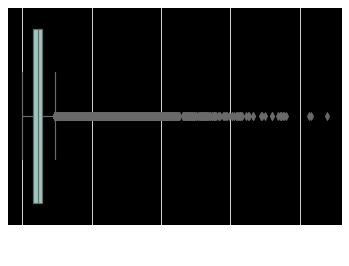

In [25]:
fig, ax = plt.subplots()
sns.boxplot(x=plate_df['platelets'].dropna(), orient='h')
plt.show()

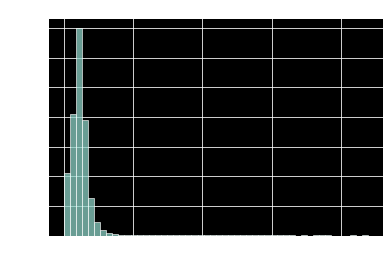

In [23]:
ax = sns.histplot(data=plate_df['platelets'].dropna(), bins=50)

In [16]:
#creatinine
query = '''
         with creatinine_ids as (
             SELECT
                c.concept_id, concept_name
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
            WHERE c.concept_id in (37029387,4013964,2212294,3051825)
           UNION DISTINCT
           SELECT
                c.concept_id, concept_name
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
            INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor` ca
                ON c.concept_id = ca.descendant_concept_id
                AND ca.ancestor_concept_id in (37029387,4013964,2212294,3051825)
                AND c.invalid_reason is null
            )
            SELECT value_as_number as creatinine FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (select concept_id from creatinine_ids)'''
creat_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [53]:
print(creat_df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = creat_df['creatinine'].quantile(0.25)
Q3 = creat_df['creatinine'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

           creatinine
count  10671165.00000
mean          1.13862
std           2.08072
min          -0.75000
2.5%          0.26000
25%           0.68000
50%           0.89000
75%           1.16000
97.5%         4.13000
max        2200.00000
IQR: 0.47999999999999987


In [65]:
creat_df = creat_df[creat_df['creatinine'].between(0,5)]

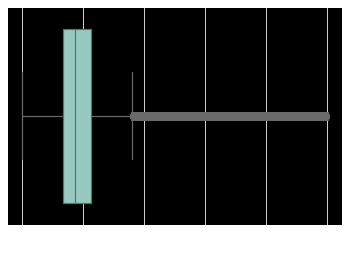

In [66]:
fig, ax = plt.subplots()
sns.boxplot(x=creat_df['creatinine'].dropna(), orient='h')
plt.show()

<AxesSubplot:xlabel='creatinine', ylabel='Count'>

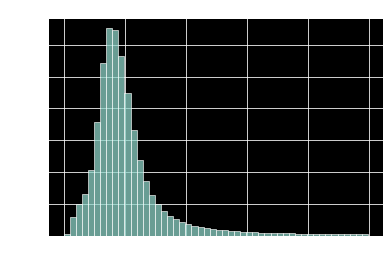

In [67]:
sns.histplot(creat_df['creatinine'].dropna(), bins=50)

In [19]:
# GCS
query = f'''SELECT value_as_number as gcs FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
where measurement_concept_id = 3032652 and value_as_number >= 3 and value_as_number <= 15
'''
gcs_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [57]:
print(gcs_df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = gcs_df['gcs'].quantile(0.25)
Q3 = gcs_df['gcs'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                 gcs
count  8382272.00000
mean        13.28353
std          2.93930
min          3.00000
2.5%         3.00000
25%         12.00000
50%         15.00000
75%         15.00000
97.5%       15.00000
max         15.00000
IQR: 3.0


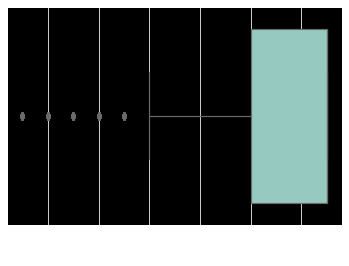

In [32]:
fig, ax = plt.subplots()
sns.boxplot(x=gcs_df['gcs'].dropna(), orient='h')
plt.show()

<AxesSubplot:xlabel='gcs', ylabel='Count'>

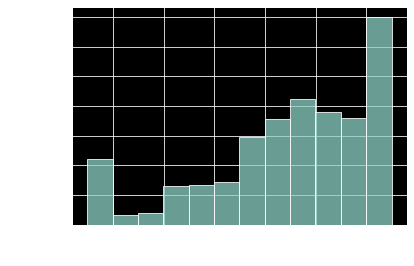

In [42]:
sns.histplot(x=gcs_df['gcs'], bins=np.arange(2.99,15.99,1))

In [20]:
# MAP
query = f'''SELECT value_as_number as map FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
where measurement_concept_id = 3027598 
'''
map_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [58]:
print(map_df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = map_df['map'].quantile(0.25)
Q3 = map_df['map'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                  map
count  59735806.00000
mean         84.83901
std          16.27828
min        -268.00000
2.5%         56.00000
25%          74.00000
50%          84.00000
75%          95.00000
97.5%       117.00000
max         361.00000
IQR: 21.0


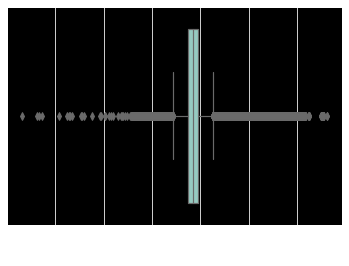

In [44]:
fig, ax = plt.subplots()
sns.boxplot(x=map_df['map'].dropna(), orient='h')
plt.show()

<AxesSubplot:xlabel='map', ylabel='Count'>

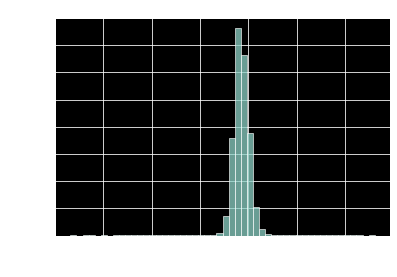

In [59]:
sns.histplot(map_df['map'].dropna(), bins=50)

In [21]:
# urine
query = f'''SELECT value_as_number as urine FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
where measurement_concept_id = 45876241 
'''
ur_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [60]:
print(ur_df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = ur_df['urine'].quantile(0.25)
Q3 = ur_df['urine'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                urine
count  17833268.00000
mean        261.01037
std         273.58686
min       -9000.00000
2.5%          0.00000
25%          66.00000
50%         200.00000
75%         380.00000
97.5%       900.00000
max       99090.00000
IQR: 314.0


In [68]:
ur_df = ur_df[ur_df['urine'].between(0,2000)]

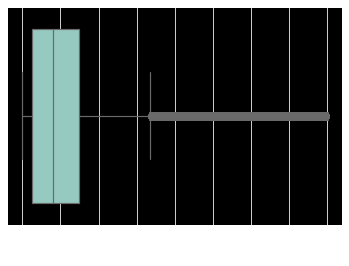

In [69]:
fig, ax = plt.subplots()
sns.boxplot(x=ur_df['urine'].dropna(), orient='h')
plt.show()

<AxesSubplot:xlabel='urine', ylabel='Count'>

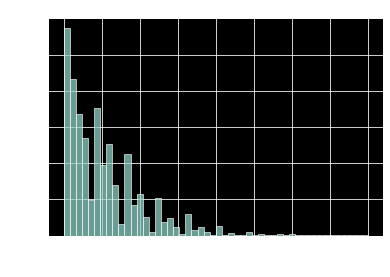

In [70]:
sns.histplot(ur_df['urine'].dropna(), bins=50)

In [71]:
#bilirubin
query = '''
         with bilirubin_ids as (
             SELECT
                c.concept_id, concept_name
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
            WHERE c.concept_id in (3024128, 4230543)
           UNION DISTINCT
           SELECT
                c.concept_id, concept_name
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
            INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor` ca
                ON c.concept_id = ca.descendant_concept_id
                AND ca.ancestor_concept_id in (3024128, 4230543)
                AND c.invalid_reason is null
            )
            SELECT value_as_number as bilirubin FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (select concept_id from bilirubin_ids)'''
bili_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [72]:
print(bili_df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = bili_df['bilirubin'].quantile(0.25)
Q3 = bili_df['bilirubin'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

           bilirubin
count  7038329.00000
mean         1.27914
std          3.12225
min        -10.00000
2.5%         0.20000
25%          0.40000
50%          0.50000
75%          0.80000
97.5%        9.70000
max       1206.00000
IQR: 0.4


In [76]:
bili_df = bili_df[bili_df['bilirubin'].between(0,10)]

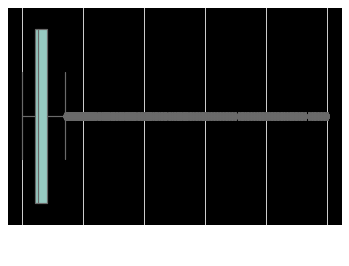

In [77]:
fig, ax = plt.subplots()
sns.boxplot(x=bili_df['bilirubin'].dropna(), orient='h')
plt.show()

<AxesSubplot:xlabel='bilirubin', ylabel='Count'>

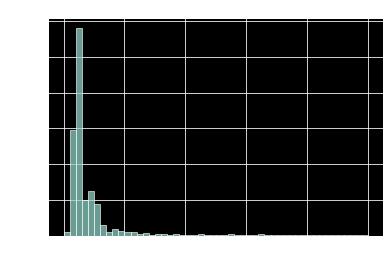

In [78]:
sns.histplot(bili_df['bilirubin'].dropna(), bins=50)

In [79]:
#pao2
query = '''
            SELECT value_as_number as pao2 FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id = 3027801'''
pao2_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [80]:
print(pao2_df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = pao2_df['pao2'].quantile(0.25)
Q3 = pao2_df['pao2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

               pao2
count  803985.00000
mean      176.13344
std       110.79542
min         2.30000
2.5%       41.00000
25%        86.60000
50%       150.00000
75%       236.60000
97.5%     455.00000
max      1240.00000
IQR: 150.0


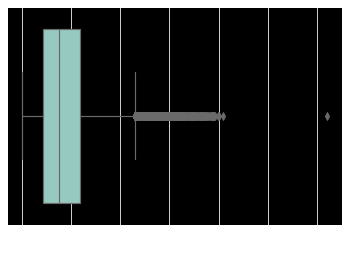

In [82]:
fig, ax = plt.subplots()
sns.boxplot(x=pao2_df['pao2'].dropna(), orient='h')
plt.show()

<AxesSubplot:xlabel='pao2', ylabel='Count'>

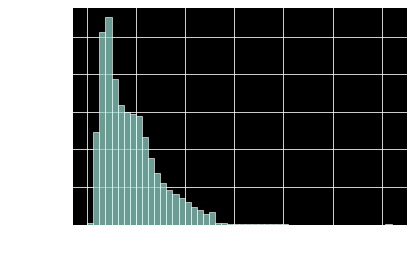

In [83]:
sns.histplot(pao2_df['pao2'].dropna(), bins=50)

In [100]:
#fio2
query = '''
        with fio2_vals as (
            SELECT CAST(meas_value as float64) as meas_value FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
            where upper(display_name) = 'FIO2 (%)' or (upper(display_name) = 'FIO2 %' and upper(source_display_name) = 'RN CLINICAL SCREENING')
            )
            
            select 
            case 
                when 
                    meas_value > 1 
                then
                    meas_value / 100
                else 
                    meas_value
            end as fio2
            from fio2_vals
        '''
fio2_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [101]:
print(fio2_df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = fio2_df['fio2'].quantile(0.25)
Q3 = fio2_df['fio2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                fio2
count  6886069.00000
mean         0.45624
std          0.27127
min       -104.00000
2.5%         0.21000
25%          0.25000
50%          0.40000
75%          0.51000
97.5%        1.00000
max         12.00000
IQR: 0.26


In [102]:
fio2_df = fio2_df[fio2_df['fio2'].between(0,1)]

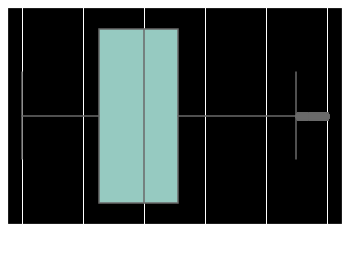

In [122]:
fig, ax = plt.subplots()
sns.boxplot(x=fio2_df['fio2'].dropna(), orient='h')
plt.show()

<AxesSubplot:xlabel='fio2', ylabel='Count'>

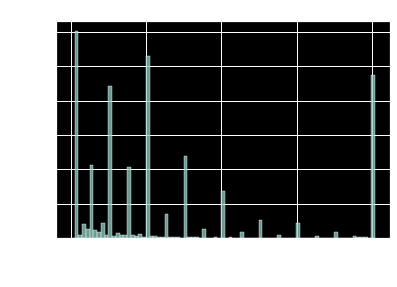

In [138]:
sns.histplot(fio2_df['fio2'].dropna(), bins=np.arange(.199,1.01,.01))

In [106]:
#vent mode
query = '''
        SELECT meas_value as vent_mode FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
        where (upper(display_name) = 'VENT MODE' or upper(display_name) = 'VENTILATION MODE') and
        (meas_value <> 'STANDBY' and meas_value <> 'MONITOR' and meas_value is not null)   
        '''
vent_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [108]:
vent_df.describe()

,vent_mode
count,46032932
unique,6196
top,IPPV
freq,12190180


<AxesSubplot:xlabel='vent_mode', ylabel='Count'>

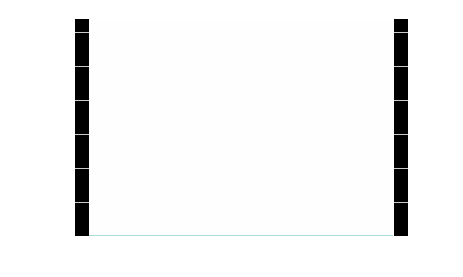

In [110]:
sns.histplot(vent_df['vent_mode'].dropna())

In [142]:
#lactate
# modify value based on unit_concept_id 8840 -> mg/dL
query = '''
            WITH lactate_vals as (
            SELECT 
            case when unit_concept_id = 8840 then value_as_number/9.0
                 else value_as_number
            end value_as_number 
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (3047181, 40762125, 3014111, 3020138))
            select value_as_number as lactate from lactate_vals
        '''
lac_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [143]:
print(lac_df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = lac_df['lactate'].quantile(0.25)
Q3 = lac_df['lactate'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

            lactate
count  547886.00000
mean        2.32078
std         2.27900
min         0.18889
2.5%        0.60000
25%         1.10000
50%         1.60000
75%         2.56000
97.5%       9.20000
max        42.40000
IQR: 1.46


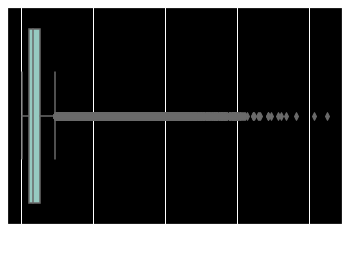

In [144]:
fig, ax = plt.subplots()
sns.boxplot(x=lac_df['lactate'].dropna(), orient='h')
plt.show()

<AxesSubplot:xlabel='lactate', ylabel='Count'>

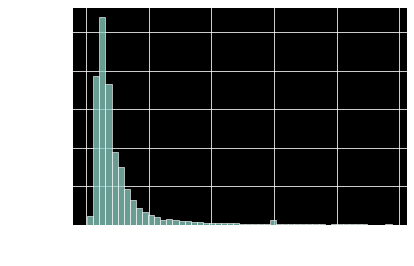

In [114]:
sns.histplot(lac_df['lactate'].dropna(), bins=50)

In [130]:
#spo2
query = '''
        SELECT cast(meas_value as float64) as spo2 FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
        where (upper(display_name) = 'OXYGEN SATURATION' AND upper(source_display_name) = 'SPO2') 
           or (upper(display_name) like 'SPO2 - %' and upper(source_display_name) = 'DEVICES TESTING TEMPLATE')   
        '''
spo2_df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)

In [131]:
print(spo2_df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = spo2_df['spo2'].quantile(0.25)
Q3 = spo2_df['spo2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                  spo2
count  133048482.00000
mean          97.91155
std            3.95830
min           -1.00000
2.5%          91.00000
25%           97.00000
50%           99.00000
75%          100.00000
97.5%        100.00000
max         1400.00000
IQR: 3.0


In [134]:
spo2_df = spo2_df[spo2_df['spo2'].between(0,100)]

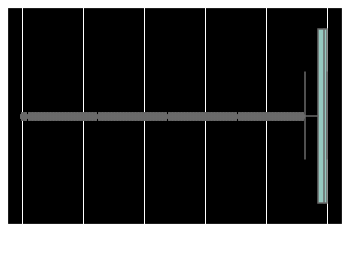

In [135]:
fig, ax = plt.subplots()
sns.boxplot(x=spo2_df['spo2'].dropna(), orient='h')
plt.show()

<AxesSubplot:xlabel='spo2', ylabel='Count'>

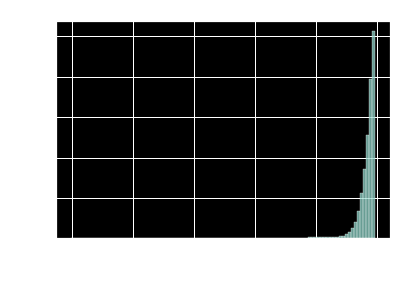

In [136]:
sns.histplot(spo2_df['spo2'].dropna(), bins=np.arange(-0.5,100.5,1))

# Lactate individual check
## 3047181, 40762125, 3014111, 3020138

In [153]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3047181)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3047181,Lactate [Moles/volume] in Blood,8753,mmol/L,407716
1,3047181,Lactate [Moles/volume] in Blood,8748,ug/L,11
2,3047181,Lactate [Moles/volume] in Blood,9573,MMOLL,7


In [152]:
query = '''
            WITH lactate_vals as (
            SELECT 
            case when unit_concept_id = 8840 then value_as_number/9.0 -- mg/dL -> mmol/L
                 when unit_concept_id = 8748 then value_as_number*0.0001/9.0 -- ug/L -> mmol/L
                 else value_as_number
            end value_as_number 
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id = 3047181 and value_as_number is not null)
            select value_as_number as lactate from lactate_vals
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['lactate'].quantile(0.25)
Q3 = df['lactate'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

            lactate
count  407734.00000
mean        2.29125
std         2.12591
min         0.00006
2.5%        0.60000
25%         1.10000
50%         1.60000
75%         2.50000
97.5%       8.90000
max        24.40000
IQR: 1.4


In [154]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id = 40762125
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,40762125,Lactate [Mass/volume] in Blood,8753,mmole/L,77088
1,40762125,Lactate [Mass/volume] in Blood,8753,mmol/L,4200
2,40762125,Lactate [Mass/volume] in Blood,<NA>,None,14


In [155]:
query = '''
            WITH lactate_vals as (
            SELECT 
            case when unit_concept_id = 8840 then value_as_number/9.0 -- mg/dL -> mmol/L
                 when unit_concept_id = 8748 then value_as_number*0.0001/9.0 -- ug/L -> mmol/L
                 else value_as_number
            end value_as_number 
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id = 40762125 and value_as_number is not null)
            select value_as_number as lactate from lactate_vals
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['lactate'].quantile(0.25)
Q3 = df['lactate'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

           lactate
count  81302.00000
mean       2.11615
std        2.17849
min        0.30000
2.5%       0.43000
25%        0.93000
50%        1.45000
75%        2.40000
97.5%      8.49000
max       20.00000
IQR: 1.4699999999999998


In [156]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3014111)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3014111,Lactate [Moles/volume] in Serum or Plasma,8753,mmol/L,58614
1,3014111,Lactate [Moles/volume] in Serum or Plasma,8753,mmol/l,3


In [157]:
query = '''
            WITH lactate_vals as (
            SELECT 
            case when unit_concept_id = 8840 then value_as_number/9.0 -- mg/dL -> mmol/L
                 when unit_concept_id = 8748 then value_as_number*0.0001/9.0 -- ug/L -> mmol/L
                 else value_as_number
            end value_as_number 
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id = 3014111 and value_as_number is not null)
            select value_as_number as lactate from lactate_vals
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['lactate'].quantile(0.25)
Q3 = df['lactate'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

           lactate
count  58617.00000
mean       2.81192
std        3.19574
min        0.20000
2.5%       0.80000
25%        1.30000
50%        1.90000
75%        2.90000
97.5%     12.60000
max       42.40000
IQR: 1.5999999999999999


In [158]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3020138)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3020138,Lactate [Mass/volume] in Serum or Plasma,8840,mg/dL,140
1,3020138,Lactate [Mass/volume] in Serum or Plasma,8753,mmol/L,92
2,3020138,Lactate [Mass/volume] in Serum or Plasma,<NA>,None,1


In [159]:
query = '''
            WITH lactate_vals as (
            SELECT 
            case when unit_concept_id = 8840 then value_as_number/9.0 -- mg/dL -> mmol/L
                 when unit_concept_id = 8748 then value_as_number*0.0001/9.0 -- ug/L -> mmol/L
                 else value_as_number
            end value_as_number 
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id = 3020138 and value_as_number is not null)
            select value_as_number as lactate from lactate_vals
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['lactate'].quantile(0.25)
Q3 = df['lactate'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

         lactate
count  233.00000
mean     1.60033
std      1.25140
min      0.18889
2.5%     0.65333
25%      1.00000
50%      1.30000
75%      1.77778
97.5%    3.89111
max     12.80000
IQR: 0.7777777777777777


In [160]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3047181, 40762125, 3014111, 3020138)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3047181,Lactate [Moles/volume] in Blood,8753,mmol/L,407716
1,40762125,Lactate [Mass/volume] in Blood,8753,mmole/L,77088
2,3014111,Lactate [Moles/volume] in Serum or Plasma,8753,mmol/L,58614
3,40762125,Lactate [Mass/volume] in Blood,8753,mmol/L,4200
4,3020138,Lactate [Mass/volume] in Serum or Plasma,8840,mg/dL,140
5,3020138,Lactate [Mass/volume] in Serum or Plasma,8753,mmol/L,92
6,40762125,Lactate [Mass/volume] in Blood,<NA>,None,14
7,3047181,Lactate [Moles/volume] in Blood,8748,ug/L,11
8,3047181,Lactate [Moles/volume] in Blood,9573,MMOLL,7
9,3014111,Lactate [Moles/volume] in Serum or Plasma,8753,mmol/l,3


In [161]:
query = '''
            WITH lactate_vals as (
            SELECT 
            case when unit_concept_id = 8840 then value_as_number/9.0 -- mg/dL -> mmol/L
                 when unit_concept_id = 8748 then value_as_number*0.0001/9.0 -- ug/L -> mmol/L
                 else value_as_number
            end value_as_number 
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (3047181, 40762125, 3014111, 3020138) and value_as_number is not null)
            select value_as_number as lactate from lactate_vals
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['lactate'].quantile(0.25)
Q3 = df['lactate'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

            lactate
count  547886.00000
mean        2.32068
std         2.27899
min         0.00006
2.5%        0.60000
25%         1.10000
50%         1.60000
75%         2.56000
97.5%       9.20000
max        42.40000
IQR: 1.46


# Bilirubin individual check
## 3024128, 4230543

In [169]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3024128)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3024128,Bilirubin.total [Mass/volume] in Serum or Plasma,8840,mg/dL,6534350
1,3024128,Bilirubin.total [Mass/volume] in Serum or Plasma,8840,MG/DL,21281
2,3024128,Bilirubin.total [Mass/volume] in Serum or Plasma,<NA>,None,8625
3,3024128,Bilirubin.total [Mass/volume] in Serum or Plasma,8840,mg/dl,6720


In [28]:
query = '''
            WITH bilirubin_vals as (
            SELECT 
            case when unit_concept_id = 8840 then value_as_number/17.1 -- mg/dL -> mmol/L
                 when unit_concept_id = 8748 then value_as_number*0.0001/17.1 -- ug/L -> mmol/L
                 else value_as_number
            end as value_As_number
            --value_as_number * 17.1 as value_as_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id = 3024128 and value_as_number is not null)
            select value_as_number as bilirubin from bilirubin_vals where value_as_number > 0
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['bilirubin'].quantile(0.25)
Q3 = df['bilirubin'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

           bilirubin
count  6570793.00000
mean         0.07274
std          0.18656
min          0.00585
2.5%         0.01170
25%          0.02339
50%          0.02924
75%          0.04678
97.5%        0.53216
max         71.00000
IQR: 0.023391812865497075


In [171]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (4230543)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,4230543,"Bilirubin, total measurement",<NA>,None,218691
1,4230543,"Bilirubin, total measurement",8840,mg/dL,203417
2,4230543,"Bilirubin, total measurement",8840,mg/dL (See scan or EMR data for detail),17232
3,4230543,"Bilirubin, total measurement",8840,mg/dl,22
4,4230543,"Bilirubin, total measurement",8588,mm,3
5,4230543,"Bilirubin, total measurement",8749,umol/L,2
6,4230543,"Bilirubin, total measurement",8840,MG/DL,2
7,4230543,"Bilirubin, total measurement",8840,mG/dL,1
8,4230543,"Bilirubin, total measurement",8713,gm/dl,1


In [31]:
query = '''
            WITH bilirubin_vals as (
            SELECT 
            case when unit_concept_id = 8840 then value_as_number/17.1 -- mg/dL -> mmol/L
                 when unit_concept_id = 8748 then value_as_number*0.0001/17.1 -- ug/L -> mmol/L
                 else value_as_number
            end as value_As_number
            --case when unit_concept_id = 8749 then value_as_number -- umol/L -> mg/dL
            --     else value_as_number * 17.1
            --end value_as_number 
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id = 4230543 and value_as_number is not null)
            select value_as_number as bilirubin from bilirubin_vals where value_as_number > 0
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['bilirubin'].quantile(0.25)
Q3 = df['bilirubin'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

          bilirubin
count  439228.00000
mean        1.13876
std         3.79003
min         0.00058
2.5%        0.01170
25%         0.02924
50%         0.20000
75%         0.80000
97.5%       9.40000
max       481.00000
IQR: 0.7707602339181288


In [175]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (2213323)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,2213323,"Bilirubin, total, transcutaneous",<NA>,None,27975
1,2213323,"Bilirubin, total, transcutaneous",8840,mg/dL,7


In [33]:
query = '''
            WITH bilirubin_vals as (
            SELECT 
            case when unit_concept_id = 8840 then value_as_number/17.1 -- mg/dL -> mmol/L
                 when unit_concept_id = 8748 then value_as_number*0.0001/17.1 -- ug/L -> mmol/L
                 else value_as_number
            end as value_As_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id = 2213323 and value_as_number is not null)
            select value_as_number as bilirubin from bilirubin_vals where value_as_number > 0
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['bilirubin'].quantile(0.25)
Q3 = df['bilirubin'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

         bilirubin
count  27651.00000
mean      10.42229
std        8.41237
min        0.04000
2.5%       1.50000
25%        7.90000
50%       10.80000
75%       13.20000
97.5%     17.30000
max     1206.00000
IQR: 5.299999999999999


In [177]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3045524)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3045524,Bilirubin direct and total panel [Mass/volume]...,8840,mg/dL,161508


In [36]:
query = '''
            WITH bilirubin_vals as (
            SELECT 
            case when unit_concept_id = 8840 then value_as_number/17.1 -- mg/dL -> mmol/L
                 when unit_concept_id = 8748 then value_as_number*0.0001/17.1 -- ug/L -> mmol/L
                 else value_as_number
            end as value_As_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id = 3045524 and value_as_number is not null)
            select value_as_number as bilirubin from bilirubin_vals where value_as_number > 0
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['bilirubin'].quantile(0.25)
Q3 = df['bilirubin'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

          bilirubin
count  161508.00000
mean        0.16459
std         0.25138
min         0.00585
2.5%        0.01170
25%         0.02339
50%         0.03509
75%         0.25146
97.5%       0.81287
max         2.92398
IQR: 0.22807017543859648


In [179]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3024128, 4230543, 3045524)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3024128,Bilirubin.total [Mass/volume] in Serum or Plasma,8840,mg/dL,6534350
1,4230543,"Bilirubin, total measurement",<NA>,None,218691
2,4230543,"Bilirubin, total measurement",8840,mg/dL,203417
3,3045524,Bilirubin direct and total panel [Mass/volume]...,8840,mg/dL,161508
4,3024128,Bilirubin.total [Mass/volume] in Serum or Plasma,8840,MG/DL,21281
5,4230543,"Bilirubin, total measurement",8840,mg/dL (See scan or EMR data for detail),17232
6,3024128,Bilirubin.total [Mass/volume] in Serum or Plasma,<NA>,None,8625
7,3024128,Bilirubin.total [Mass/volume] in Serum or Plasma,8840,mg/dl,6720
8,4230543,"Bilirubin, total measurement",8840,mg/dl,22
9,4230543,"Bilirubin, total measurement",8588,mm,3


In [34]:
query = '''
            WITH bilirubin_vals as (
            SELECT 
            case when unit_concept_id = 8840 then value_as_number/17.1 -- mg/dL -> mmol/L
                 when unit_concept_id = 8748 then value_as_number*0.0001/17.1 -- ug/L -> mmol/L
                 else value_as_number
            end as value_As_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (3024128, 4230543, 3045524) and value_as_number is not null)
            select value_as_number as bilirubin from bilirubin_vals where value_As_number > 0
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['bilirubin'].quantile(0.25)
Q3 = df['bilirubin'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

           bilirubin
count  7171529.00000
mean         0.14010
std          0.98910
min          0.00058
2.5%         0.01170
25%          0.02339
50%          0.02924
75%          0.05263
97.5%        0.84211
max        481.00000
IQR: 0.029239766081871343


# Urine individual check
## 45876241, 3012565	

In [55]:
query = '''
SELECT measurement_concept_id, c.concept_name, m.load_table_id, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` m
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (45876241)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, m.load_table_id, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,load_table_id,unit_concept_id,unit_source_value,cnt
0,45876241,Input/Output,shc_ip_flwsht_rec,8587,mL,7820192
1,45876241,Input/Output,shc_ip_flwsht_rec,8587,ml,6619749
2,45876241,Input/Output,lpch_ip_flwsht_rec,8587,mL,3393327


In [184]:
query = '''
            WITH urine_vals as (
            SELECT 
            value_as_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (45876241) and value_as_number is not null)
            select value_as_number as urine from urine_vals
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['urine'].quantile(0.25)
Q3 = df['urine'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                urine
count  17833268.00000
mean        261.01037
std         273.58686
min       -9000.00000
2.5%          0.00000
25%          66.00000
50%         200.00000
75%         380.00000
97.5%       900.00000
max       99090.00000
IQR: 314.0


In [185]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3012565)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3012565,Volume of 24 hour Urine,8587,mL,3752
1,3012565,Volume of 24 hour Urine,8930,mL/24 h,272
2,3012565,Volume of 24 hour Urine,<NA>,None,93
3,3012565,Volume of 24 hour Urine,8587,ML,87
4,3012565,Volume of 24 hour Urine,8930,mL/24 hr,46
5,3012565,Volume of 24 hour Urine,0,L/day,26
6,3012565,Volume of 24 hour Urine,8837,ug/dL,2
7,3012565,Volume of 24 hour Urine,8930,mL/24h,1
8,3012565,Volume of 24 hour Urine,8930,ml/24h,1


In [188]:
query = '''
            WITH urine_vals as (
            SELECT 
            case when unit_source_value = 'L/day' then value_As_number*1000
                 when unit_source_value = 'ug/dL' then null
            else value_as_number
            end value_as_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (3012565) and value_as_number is not null)
            select value_as_number as urine from urine_vals
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['urine'].quantile(0.25)
Q3 = df['urine'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

             urine
count   4278.00000
mean    1958.31907
std     1025.88626
min        2.00000
2.5%     463.77500
25%     1258.00000
50%     1823.00000
75%     2524.75000
97.5%   4202.10000
max    20569.00000
IQR: 1266.75


In [189]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (45876241,3012565)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,45876241,Input/Output,8587,mL,11213519
1,45876241,Input/Output,8587,ml,6619749
2,3012565,Volume of 24 hour Urine,8587,mL,3752
3,3012565,Volume of 24 hour Urine,8930,mL/24 h,272
4,3012565,Volume of 24 hour Urine,<NA>,None,93
5,3012565,Volume of 24 hour Urine,8587,ML,87
6,3012565,Volume of 24 hour Urine,8930,mL/24 hr,46
7,3012565,Volume of 24 hour Urine,0,L/day,26
8,3012565,Volume of 24 hour Urine,8837,ug/dL,2
9,3012565,Volume of 24 hour Urine,8930,mL/24h,1


In [190]:
query = '''
            WITH urine_vals as (
            SELECT 
            case when unit_source_value = 'L/day' then value_As_number*1000
                 when unit_source_value = 'ug/dL' then null
            else value_as_number
            end value_as_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (45876241,3012565) and value_as_number is not null)
            select value_as_number as urine from urine_vals
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['urine'].quantile(0.25)
Q3 = df['urine'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                urine
count  17837546.00000
mean        261.41744
std         275.27245
min       -9000.00000
2.5%          0.00000
25%          66.00000
50%         200.00000
75%         380.00000
97.5%       917.00000
max       99090.00000
IQR: 314.0


In [13]:
query = '''
WITH urine_from_measurement AS (
					SELECT 
						measure.person_id, 
						cast(measure.measurement_DATETIME as date) as urine_date,
						measure.value_as_number, 
						concept.concept_name AS measure_type 
					FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` measure
					INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` AS concept
					ON measure.measurement_concept_id = concept.concept_id
					where measurement_concept_id = 45876241 and measure.value_as_number >= 0 and measure.value_as_number IS NOT NULL
				),
                weight_from_measurement as (
                )
				urine_window AS (
					SELECT 
						urine.person_id,
						urine.urine_date, 
						urine.value_as_number AS urine_volume,
					FROM  urine_from_measurement as urine
					ORDER BY person_id, urine_date
				),
				urine_initial_rollup AS (
						SELECT 
							person_id, 
							urine_date, 
							SUM(urine_volume) as urine_daily_output_orig
						FROM urine_window 
						GROUP BY person_id, urine_date
					),
                urine_output_rollup AS (
                    SELECT 
                        person_id, 
                        urine_date, 
                        urine_daily_output_orig as urine
                    FROM urine_initial_rollup 
                )
        
                select urine from urine_output_rollup
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['urine'].quantile(0.25)
Q3 = df['urine'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

               urine
count  2989396.00000
mean      1557.09170
std       1398.46761
min          0.00000
2.5%         5.00000
25%        545.00000
50%       1200.00000
75%       2175.00000
97.5%     5125.00000
max     101140.00000
IQR: 1630.0


In [14]:
query = '''
WITH urine_from_measurement AS (
					SELECT 
						measure.person_id, 
						cast(measure.measurement_DATETIME as date) as urine_date,
						measure.value_as_number, 
						concept.concept_name AS measure_type 
					FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` measure
					INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` AS concept
					ON measure.measurement_concept_id = concept.concept_id
					where measurement_concept_id = 45876241 and measure.value_as_number >= 0 and measure.value_as_number IS NOT NULL
				),
				urine_window AS (
					SELECT 
						urine.person_id,
						urine.urine_date, 
						urine.value_as_number AS urine_volume,
					FROM  urine_from_measurement as urine
					ORDER BY person_id, urine_date
				),
				urine_initial_rollup AS (
						SELECT 
							person_id, 
							urine_date, 
							SUM(urine_volume) as urine_daily_output_orig
						FROM urine_window 
						GROUP BY person_id, urine_date
					),
                urine_output_rollup AS (
                    SELECT 
                        person_id, 
                        urine_date, 
                        urine_daily_output_orig as urine
                    FROM urine_initial_rollup 
                ),
                urine_vals as (
            SELECT 
            case when unit_source_value = 'L/day' then value_As_number*1000
                 when unit_source_value = 'ug/dL' then null
            else value_as_number
            end urine
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (3012565) and value_as_number is not null)
        
                select urine from urine_output_rollup
                union all
                select urine from urine_vals
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['urine'].quantile(0.25)
Q3 = df['urine'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

               urine
count  2993674.00000
mean      1557.66506
std       1398.08806
min          0.00000
2.5%         5.00000
25%        548.00000
50%       1200.00000
75%       2175.00000
97.5%     5125.00000
max     101140.00000
IQR: 1627.0


# PAO2 individual check
## 3027801

In [193]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3027801)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3027801,Oxygen [Partial pressure] in Arterial blood,8876,mm HG,323812
1,3027801,Oxygen [Partial pressure] in Arterial blood,8876,mmHg,319706
2,3027801,Oxygen [Partial pressure] in Arterial blood,8876,mm Hg,160464
3,3027801,Oxygen [Partial pressure] in Arterial blood,<NA>,None,3


In [194]:
query = '''
            WITH pao2_vals as (
            SELECT 
            value_as_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (3027801) and value_as_number is not null)
            select value_as_number as pao2 from pao2_vals
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['pao2'].quantile(0.25)
Q3 = df['pao2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

               pao2
count  803985.00000
mean      176.13344
std       110.79542
min         2.30000
2.5%       41.00000
25%        86.60000
50%       150.00000
75%       236.60000
97.5%     455.00000
max      1240.00000
IQR: 150.0


In [201]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3015968)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3015968,Oxygen [Partial pressure] saturation adjusted ...,8876,mm Hg,133938
1,3015968,Oxygen [Partial pressure] saturation adjusted ...,8876,mmHg,22939


In [202]:
query = '''
            WITH pao2_vals as (
            SELECT 
            value_as_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (3015968) and value_as_number is not null)
            select value_as_number as pao2 from pao2_vals
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['pao2'].quantile(0.25)
Q3 = df['pao2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

               pao2
count  156877.00000
mean       26.75788
std         3.52093
min        16.00000
2.5%       22.60000
25%        25.20000
50%        26.40000
75%        27.80000
97.5%      32.90000
max       100.00000
IQR: 2.6000000000000014


In [203]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3021706)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3021706,Oxygen [Partial pressure] in Arterial cord blood,8876,mmHg,21925
1,3021706,Oxygen [Partial pressure] in Arterial cord blood,8876,MM HG,79


In [204]:
query = '''
            WITH pao2_vals as (
            SELECT 
            value_as_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (3021706) and value_as_number is not null)
            select value_as_number as pao2 from pao2_vals
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['pao2'].quantile(0.25)
Q3 = df['pao2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

              pao2
count  22004.00000
mean      20.51205
std        9.72721
min        0.80000
2.5%       7.00000
25%       14.20000
50%       19.00000
75%       25.00000
97.5%     41.39250
max      165.00000
IQR: 10.8


# spO2 individual check
## jsons

In [214]:
query = f'''SELECT source_display_name, display_name, unit_value, count(observation_id) as cnt FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
where (upper(display_name) like 'SPO2 - %' and upper(source_display_name) = 'DEVICES TESTING TEMPLATE') and meas_value is not null
group by source_display_name, display_name, unit_value
order by cnt desc'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,source_display_name,display_name,unit_value,cnt
0,Devices Testing Template,SpO2 - r,%,1324923
1,Devices Testing Template,SpO2 - l,%,1193618


In [3]:
query = f'''SELECT cast(meas_value as float64) as spo2 FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
        where (upper(display_name) like 'SPO2 - %' and upper(source_display_name) = 'DEVICES TESTING TEMPLATE')and meas_value is not null and safe_cast(meas_value as float64) >= 1 and safe_cast(meas_value as float64) <= 100
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['spo2'].quantile(0.25)
Q3 = df['spo2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                spo2
count  2518451.00000
mean        96.44664
std          7.59348
min          1.00000
2.5%        74.00000
25%         98.00000
50%        100.00000
75%        100.00000
97.5%      100.00000
max        100.00000
IQR: 2.0


In [216]:
query = '''
SELECT observation_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(observation_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.observation` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = observation_concept_id
where observation_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (37031553)
    LIMIT 1000
  )
  and value_as_number is not null
group by  observation_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,observation_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,37031553,Oxygen saturation,8554,%,126348203
1,37031553,Oxygen saturation,<NA>,None,1356


In [4]:
query = '''
            WITH spo2_vals as (
            SELECT 
            value_as_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.observation` 
            where observation_concept_id in (37031553) and value_as_number is not null)
            select value_as_number as spo2 from spo2_vals where value_as_number >= 1 and value_As_number <= 100
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['spo2'].quantile(0.25)
Q3 = df['spo2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                  spo2
count  126298571.00000
mean          97.98820
std            3.24520
min            1.00000
2.5%          91.00000
25%           97.00000
50%           99.00000
75%          100.00000
97.5%        100.00000
max          100.00000
IQR: 3.0


In [224]:
query = '''
SELECT cast(observation_concept_id as string) as observation_concept_id, c.concept_name, unit_source_value, count(observation_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.observation` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = observation_concept_id
where observation_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (37031553)
    LIMIT 1000
  )
  and value_as_number is not null
  group by  observation_concept_id, c.concept_name,  unit_source_value
  UNION all
  SELECT source_display_name as observation_concept_id, display_name as concept_name, unit_value as unit_source_value, count(observation_id) as cnt 
  FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
  where (upper(display_name) like 'SPO2 - %' and upper(source_display_name) = 'DEVICES TESTING TEMPLATE') and meas_value is not null
group by  observation_concept_id, concept_name,  unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,observation_concept_id,concept_name,unit_source_value,cnt
0,37031553,Oxygen saturation,%,126348203
1,Devices Testing Template,SpO2 - r,%,1324923
2,Devices Testing Template,SpO2 - l,%,1193618
3,37031553,Oxygen saturation,None,1356


In [5]:
query = '''
            WITH spo2_vals as (
            SELECT value_as_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.observation` 
            where observation_concept_id in (37031553) and value_as_number is not null
            union all
            SELECT cast(meas_value as float64) as value_as_number FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
            where (upper(display_name) like 'SPO2 - %' and upper(source_display_name) = 'DEVICES TESTING TEMPLATE')and meas_value is not null
            )
            select value_as_number as spo2 from spo2_vals where value_As_number >= 1 and value_As_number <= 100
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['spo2'].quantile(0.25)
Q3 = df['spo2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                  spo2
count  128817022.00000
mean          97.95806
std            3.39091
min            1.00000
2.5%          91.00000
25%           97.00000
50%           99.00000
75%          100.00000
97.5%        100.00000
max          100.00000
IQR: 3.0


# FIO2 individual check

In [231]:
query = f'''SELECT source_display_name, display_name, unit_value, count(observation_id) as cnt FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
where upper(display_name) = 'FIO2 (%)' and meas_value is not null
group by source_display_name, display_name, unit_value
order by cnt desc'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)



,source_display_name,display_name,unit_value,cnt
0,Critical Care Vital Signs,FiO2 (%),%,1985002
1,Neonatal Vitals,FiO2 (%),%,1231706
2,RT Assessment,FiO2 (%),%,1186675
3,Ventilator,FiO2 (%),%,739699
4,RT Assess/ Treatment,FiO2 (%),%,242526
5,ECMO,FiO2 (%),%,210812
6,Critical Care Assessment,FiO2 (%),%,210122
7,Invasive Ventilation,FiO2 (%),%,208194
8,None,FiO2 (%),%,186358
9,BIPAP/CPAP,FiO2 (%),%,103097


In [15]:
query = f'''with fio2_vals as (SELECT cast(meas_value as float64) as meas_value FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
        where upper(display_name) = 'FIO2 (%)' and meas_value is not null),
        fio2_conv as (select 
						case 
							when meas_value > 1 then meas_value / 100
							else meas_value
						end as fiO2
					from fiO2_vals)
        select fio2 from fio2_conv where fio2 >= 0.21 and fio2 <= 1.0
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['fio2'].quantile(0.25)
Q3 = df['fio2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                fio2
count  6633893.00000
mean         0.45586
std          0.26106
min          0.21000
2.5%         0.21000
25%          0.25000
50%          0.40000
75%          0.50000
97.5%        1.00000
max          1.00000
IQR: 0.25


In [240]:
query = f'''SELECT source_display_name, display_name, unit_value, count(observation_id) as cnt FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
where display_name = 'Resuscitation Bag FiO2 Set (%)' and meas_value is not null
group by source_display_name, display_name, unit_value
order by cnt desc'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,source_display_name,display_name,unit_value,cnt
0,RT Assessment,Resuscitation Bag FiO2 Set (%),%,790121
1,Daily Cares/Safety,Resuscitation Bag FiO2 Set (%),%,202877
2,Bedside Safety Checks,Resuscitation Bag FiO2 Set (%),%,167784
3,Neonatal Daily Cares/Safety,Resuscitation Bag FiO2 Set (%),%,121162
4,Invasive Ventilation,Resuscitation Bag FiO2 Set (%),%,83161
5,Non-Invasive Ventilation,Resuscitation Bag FiO2 Set (%),%,29266
6,Safety Check,Resuscitation Bag FiO2 Set (%),%,77
7,None,Resuscitation Bag FiO2 Set (%),%,18


In [17]:
query = f'''with fio2_vals as (SELECT safe_cast(meas_value as float64) as meas_value FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
        where display_name = 'Resuscitation Bag FiO2 Set (%)' and meas_value is not null),
        fio2_conv as (select 
						case 
							when meas_value > 1 then meas_value / 100
							else meas_value
						end as fiO2
					from fiO2_vals)
        select fio2 from fio2_conv where fio2 >= 0.21 and fio2 <= 1.0
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['fio2'].quantile(0.25)
Q3 = df['fio2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                fio2
count  1390197.00000
mean         0.77678
std          0.32081
min          0.21000
2.5%         0.21000
25%          0.45000
50%          1.00000
75%          1.00000
97.5%        1.00000
max          1.00000
IQR: 0.55


In [243]:
query = f'''SELECT source_display_name, display_name, unit_value, count(observation_id) as cnt FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
where display_name = 'T-Piece Resuscitator FiO2 Set (%)' and meas_value is not null
group by source_display_name, display_name, unit_value
order by cnt desc'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,source_display_name,display_name,unit_value,cnt
0,RT Assessment,T-Piece Resuscitator FiO2 Set (%),%,202183
1,Non-Invasive Ventilation,T-Piece Resuscitator FiO2 Set (%),%,12277
2,Invasive Ventilation,T-Piece Resuscitator FiO2 Set (%),%,10802
3,None,T-Piece Resuscitator FiO2 Set (%),%,1


In [18]:
query = f'''with fio2_vals as (SELECT safe_cast(meas_value as float64) as meas_value FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
        where display_name = 'T-Piece Resuscitator FiO2 Set (%)' and meas_value is not null),
        fio2_conv as (select 
						case 
							when meas_value > 1 then meas_value / 100
							else meas_value
						end as fiO2
					from fiO2_vals)
        select fio2 from fio2_conv where fio2 >= 0.21 and fio2 <= 1.0
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['fio2'].quantile(0.25)
Q3 = df['fio2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

               fio2
count  224490.00000
mean        0.34901
std         0.18191
min         0.21000
2.5%        0.21000
25%         0.26000
50%         0.28000
75%         0.35000
97.5%       1.00000
max         1.00000
IQR: 0.08999999999999997


In [245]:
query = f'''SELECT source_display_name, display_name, unit_value, count(observation_id) as cnt FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
where display_name = 'ECMO FiO2' and meas_value is not null
group by source_display_name, display_name, unit_value
order by cnt desc'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,source_display_name,display_name,unit_value,cnt
0,ECMO,ECMO FiO2,%,103769


In [19]:
query = f'''with fio2_vals as (SELECT safe_cast(meas_value as float64) as meas_value FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
        where display_name = 'ECMO FiO2' and meas_value is not null),
        fio2_conv as (select 
						case 
							when meas_value > 1 then meas_value / 100
							else meas_value
						end as fiO2
					from fiO2_vals)
        select fio2 from fio2_conv where fio2 >= 0.21 and fio2 <= 1.0
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['fio2'].quantile(0.25)
Q3 = df['fio2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

               fio2
count  103769.00000
mean        0.54333
std         0.17726
min         0.21000
2.5%        0.25000
25%         0.40000
50%         0.50000
75%         0.65000
97.5%       0.90000
max         1.00000
IQR: 0.25


In [248]:
query = f'''SELECT source_display_name, display_name, unit_value, count(observation_id) as cnt FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
where (upper(display_name) = 'FIO2 (%)' or display_name = 'ECMO FiO2' or display_name = 'T-Piece Resuscitator FiO2 Set (%)' or display_name = 'Resuscitation Bag FiO2 Set (%)') and meas_value is not null
group by source_display_name, display_name, unit_value
order by cnt desc'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,source_display_name,display_name,unit_value,cnt
0,Critical Care Vital Signs,FiO2 (%),%,1985002
1,Neonatal Vitals,FiO2 (%),%,1231706
2,RT Assessment,FiO2 (%),%,1186675
3,RT Assessment,Resuscitation Bag FiO2 Set (%),%,790121
4,Ventilator,FiO2 (%),%,739699
5,RT Assess/ Treatment,FiO2 (%),%,242526
6,ECMO,FiO2 (%),%,210812
7,Critical Care Assessment,FiO2 (%),%,210122
8,Invasive Ventilation,FiO2 (%),%,208194
9,Daily Cares/Safety,Resuscitation Bag FiO2 Set (%),%,202877


In [4]:
query = f'''with fio2_vals as (SELECT safe_cast(meas_value as float64) as meas_value FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
        where (upper(display_name) = 'FIO2 (%)' or display_name = 'ECMO FiO2' or display_name = 'T-Piece Resuscitator FiO2 Set (%)' or display_name = 'Resuscitation Bag FiO2 Set (%)') and meas_value is not null),
        fio2_conv as (select 
						case 
							when meas_value > 1 then meas_value / 100
							else meas_value
						end as fiO2
					from fiO2_vals)
        select fio2 from fio2_conv where fio2 >= 0.21 and fio2 <= 1.0
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['fio2'].quantile(0.25)
Q3 = df['fio2'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                fio2
count  8352349.00000
mean         0.50749
std          0.29566
min          0.21000
2.5%         0.21000
25%          0.27000
50%          0.40000
75%          0.72000
97.5%        1.00000
max          1.00000
IQR: 0.44999999999999996


# GCS individual check
## 3032652

In [250]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3032652)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3032652,Glasgow coma scale,<NA>,None,8382292


In [5]:
query = '''
            WITH gcs_vals as (
            SELECT 
            value_as_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (3032652) and value_as_number is not null)
            select value_as_number as gcs from gcs_vals where value_As_number >= 3 and value_as_number <=15
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['gcs'].quantile(0.25)
Q3 = df['gcs'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                 gcs
count  8382272.00000
mean        13.28353
std          2.93930
min          3.00000
2.5%         3.00000
25%         12.00000
50%         15.00000
75%         15.00000
97.5%       15.00000
max         15.00000
IQR: 3.0


# MAP individual check
## 3027598

In [260]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3027598)
    LIMIT 1000
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3027598,Mean blood pressure,8876,mmHg,39161223
1,3027598,Mean blood pressure,<NA>,None,20574583


In [6]:
query = '''
            WITH map_vals as (
            SELECT 
            value_as_number
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
            where measurement_concept_id in (3027598) and value_as_number is not null)
            select value_as_number as map from map_vals where value_As_number >= 10
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['map'].quantile(0.25)
Q3 = df['map'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

                  map
count  59642373.00000
mean         84.97634
std          15.91122
min          10.00000
2.5%         57.00000
25%          74.00000
50%          84.00000
75%          95.00000
97.5%       117.00000
max         361.00000
IQR: 21.0


In [28]:
query = '''
with creat_values as (
    SELECT 
        case
            when unit_concept_id = 8840 then value_as_number / 0.0113122 -- umol/l -> mg/dL
            when unit_concept_id = 8837 then value_as_number * 0.001 / 0.0113122 -- ug/dL -> mg/dL
            else value_as_number 
        end as value_as_number, 
    FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` AS measure
    INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` AS concept
    ON measure.measurement_concept_id = concept.concept_id
    WHERE concept.concept_id in (
        SELECT
            c.concept_id
        FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
        WHERE c.concept_id in (37029387,4013964,2212294,3051825)
        UNION DISTINCT
        SELECT
            c.concept_id
        FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
        INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor` ca
        ON c.concept_id = ca.descendant_concept_id
        AND ca.ancestor_concept_id in (37029387,4013964,2212294,3051825)
        AND c.invalid_reason is null
    )
)
select value_as_number as creatinine from creat_values
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['creatinine'].quantile(0.25)
Q3 = df['creatinine'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

            creatinine
count   10671168.00000
mean         273.76529
std       336856.02123
min          -66.30010
2.5%           8.84001
25%           57.46009
50%           76.02412
75%           98.12415
97.5%        343.87652
max    715334948.10912
IQR: 40.66406180937396


In [27]:
query = '''
with plate_values as (
    SELECT 
        value_as_number, 
    FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` AS measure
    INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` AS concept
    ON measure.measurement_concept_id = concept.concept_id
    WHERE concept.concept_id in (
        SELECT
            c.concept_id
        FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
        WHERE c.concept_id in (37037425,40654106)
        UNION DISTINCT
        SELECT
            c.concept_id
        FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
        INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor` ca
        ON c.concept_id = ca.descendant_concept_id
        AND ca.ancestor_concept_id in (37037425,40654106)
        AND c.invalid_reason is null
    )
)
select value_as_number as platelets from plate_values
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['platelets'].quantile(0.25)
Q3 = df['platelets'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

           platelets
count  9589234.00000
mean       225.45132
std        218.85580
min          0.00000
2.5%        22.00000
25%        154.00000
50%        218.00000
75%        282.00000
97.5%      501.00000
max     357000.00000
IQR: 128.0


In [17]:
query = '''
        SELECT 
						concept_id,
						concept.concept_name AS measure_type,
                        
					FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` AS concept
          where upper(concept_name) like '%WEIGHT%' and domain_id in ('Measurement', 'Observation')
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,concept_id,measure_type
0,3098859,Birth weight of baby NOS
1,3040056,Weight-bearing restrictions during 2 day asses...
2,4014730,Child weight centiles NOS
3,40790272,Specimen dry weight | Stool
4,36207183,Weight management summary report | {Setting}
5,1012639,Birth weight indicator
6,40587844,Low molecular weight heparin assay
7,3601575,Ribbed cotton and viscose DT Type A lightweigh...
8,3612105,Respond Plus Res 4 medium lightweight stoma su...
9,3611987,Payne Mk12 0012 lightweight male urinal


In [53]:
#3550853, 3025315, 3325484, 3188635, 3312510, 4156179, 1004122, 40452545, 3265820, 3330105
query = '''
SELECT measurement_concept_id, c.concept_name, m.load_table_id, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` m
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3550853, 3025315, 3325484, 3188635, 3312510, 4156179, 1004122, 40452545, 3265820, 3330105, 
                         37111521, 35811395, 40347459, 3013762, 4178502, 3326022, 4099154, 4175354, 4099154, 3335790,
                         35810365, 46234683, 4268280, 1029318, 3027492, 45922669, 2000026491, 706022, 1034369,35811769,
                         40504677, 3026600, 40786050, 4183890, 1003901, 45508317, 2000316357, 903121, 3188642, 1036720)
    UNION DISTINCT
        SELECT
            c.concept_id
        FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
        INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor` ca
        ON c.concept_id = ca.descendant_concept_id
        AND ca.ancestor_concept_id in (3550853, 3025315, 3325484, 3188635, 3312510, 4156179, 1004122, 40452545, 3265820, 3330105, 
                         37111521, 35811395, 40347459, 3013762, 4178502, 3326022, 4099154, 4175354, 4099154, 3335790,
                         35810365, 46234683, 4268280, 1029318, 3027492, 45922669, 2000026491, 706022, 1034369,35811769,
                         40504677, 3026600, 40786050, 4183890, 1003901, 45508317, 2000316357, 903121, 3188642, 1036720)
        AND c.invalid_reason is null
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, m.load_table_id, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,load_table_id,unit_concept_id,unit_source_value,cnt
0,3025315,Body weight,shc_ip_flwsht_rec,<NA>,None,12682776
1,3025315,Body weight,shc_pat_enc,9373,ounces,11459212
2,3038553,Body mass index (BMI) [Ratio],shc_pat_enc,<NA>,None,10523108
3,3025315,Body weight,lpch_ip_flwsht_rec,<NA>,None,5453844
4,3025315,Body weight,lpch_pat_enc,9373,ounces,3338155
5,3038553,Body mass index (BMI) [Ratio],lpch_pat_enc,<NA>,None,2609549
6,3025315,Body weight,shc_ip_flwsht_rec,8739,lbs,95565
7,3025315,Body weight,shc_order_results,9529,kg,10602
8,3023166,Body weight Stated,shc_order_results,9529,kg,3107
9,3025315,Body weight,lpch_order_results,9529,kg,1222


In [25]:
#3550853, 3025315, 3325484, 3188635, 3312510, 4156179, 1004122, 40452545, 3265820, 3330105
query = '''
SELECT observation_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(observation_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.observation` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = observation_concept_id
where observation_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3550853, 3025315, 3325484, 3188635, 3312510, 4156179, 1004122, 40452545, 3265820, 3330105, 
                         37111521, 35811395, 40347459, 3013762, 4178502, 3326022, 4099154, 4175354, 4099154, 3335790,
                         35810365, 46234683, 4268280, 1029318, 3027492, 45922669, 2000026491, 706022, 1034369,35811769,
                         40504677, 3026600, 40786050, 4183890, 1003901, 45508317, 2000316357, 903121, 3188642, 1036720)
    UNION DISTINCT
        SELECT
            c.concept_id
        FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
        INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor` ca
        ON c.concept_id = ca.descendant_concept_id
        AND ca.ancestor_concept_id in (3550853, 3025315, 3325484, 3188635, 3312510, 4156179, 1004122, 40452545, 3265820, 3330105, 
                         37111521, 35811395, 40347459, 3013762, 4178502, 3326022, 4099154, 4175354, 4099154, 3335790,
                         35810365, 46234683, 4268280, 1029318, 3027492, 45922669, 2000026491, 706022, 1034369,35811769,
                         40504677, 3026600, 40786050, 4183890, 1003901, 45508317, 2000316357, 903121, 3188642, 1036720)
        AND c.invalid_reason is null
  )
  and value_as_number is not null
group by  observation_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,observation_concept_id,concept_name,unit_concept_id,unit_source_value,cnt


In [29]:
#3550853, 3025315, 3325484, 3188635, 3312510, 4156179, 1004122, 40452545, 3265820, 3330105
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (3025315)
    UNION DISTINCT
        SELECT
            c.concept_id
        FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
        INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor` ca
        ON c.concept_id = ca.descendant_concept_id
        AND ca.ancestor_concept_id in (3025315)
        AND c.invalid_reason is null
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt
0,3025315,Body weight,<NA>,None,18136661
1,3025315,Body weight,9373,ounces,14797367
2,3025315,Body weight,8739,lbs,95603
3,3025315,Body weight,9529,kg,11824


In [35]:
query = '''
with weight_values as (
    SELECT 
        case 
            when unit_concept_id = 9373 or unit_concept_id is null then value_as_number/35.274
            when unit_concept_id = 8739 then value_as_number/2.205
            else value_as_number
        end as value_as_number
    FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` AS measure
    INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` AS concept
    ON measure.measurement_concept_id = concept.concept_id
    WHERE concept.concept_id in (
        SELECT
            c.concept_id
        FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
        WHERE c.concept_id in (3025315)
        UNION DISTINCT
        SELECT
            c.concept_id
        FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
        INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor` ca
        ON c.concept_id = ca.descendant_concept_id
        AND ca.ancestor_concept_id in (3025315)
        AND c.invalid_reason is null
    )
)
select value_as_number as weight from weight_values
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

               weight
count  33041455.00000
mean         63.47488
std          34.19846
min         -95.23810
2.5%          3.81017
25%          48.99955
50%          66.22441
75%          82.55372
97.5%       120.59874
max       70344.21769
IQR: 33.55417588025174


In [43]:
query = '''
        WITH urine_from_measurement AS (
            SELECT 
                measure.person_id, 
                measure.measurement_DATETIME,
                measure.value_as_number, 
                concept.concept_name AS measure_type 
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` measure
            INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` AS concept
            ON measure.measurement_concept_id = concept.concept_id
            where measurement_concept_id = 45876241 and measure.value_as_number >= 0 and measure.value_as_number IS NOT NULL
        ),
        urine_24_from_measurement AS (
            SELECT 
                measure.person_id, 
                measure.measurement_DATETIME,
                measure.value_as_number, 
                concept.concept_name AS measure_type 
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` measure
            INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` AS concept
            ON measure.measurement_concept_id = concept.concept_id
            where measurement_concept_id = 3012565 and measure.value_as_number >= 0 and measure.value_as_number IS NOT NULL
        ),
        weight_from_measurement AS (
            SELECT
                measure.person_id,
                measure.measurement_DATETIME,
                case 
                    when unit_concept_id = 9373 or unit_concept_id is null then value_as_number/35.274
                    when unit_concept_id = 8739 then value_as_number/2.205
                    else value_as_number
                end as value_as_number,
                concept.concept_name AS measure_type 
            FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` AS measure
            INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` AS concept
            ON measure.measurement_concept_id = concept.concept_id
            WHERE concept.concept_id in (
                SELECT
                    c.concept_id
                FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
                WHERE c.concept_id in (3025315)
                UNION DISTINCT
                SELECT
                    c.concept_id
                FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
                INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor` ca
                ON c.concept_id = ca.descendant_concept_id
                AND ca.ancestor_concept_id in (3025315)
                AND c.invalid_reason is null
            ) and measure.value_as_number > 0
        ),
        urine_window AS (
            SELECT 
                susp_inf_rollup.*, 
                urine.measurement_DATETIME AS urine_datetime, 
                urine.value_as_number AS urine_volume,
                datetime_diff(measurement_DATETIME, index_date, DAY) as days_urine_index
            FROM `som-nero-nigam-starr.jlemmon_explore.sepsis_susp_inf_rollup` AS susp_inf_rollup
            LEFT JOIN urine_from_measurement as urine
                ON susp_inf_rollup.person_id = urine.person_id 
            WHERE
                CAST(index_date AS DATE) >= CAST(DATETIME_SUB(measurement_DATETIME, INTERVAL 2 DAY) AS DATE) AND
                CAST(index_date As DATE) <= CAST(DATETIME_ADD(measurement_DATETIME, INTERVAL 1 DAY) AS DATE)
            ORDER BY person_id, admit_date, measurement_DATETIME
        ),
        urine_24_window AS (
            SELECT 
                susp_inf_rollup.*, 
                urine.measurement_DATETIME AS urine_datetime, 
                urine.value_as_number AS urine_volume,
                datetime_diff(measurement_DATETIME, index_date, DAY) as days_urine_index
            FROM `som-nero-nigam-starr.jlemmon_explore.sepsis_susp_inf_rollup` AS susp_inf_rollup
            LEFT JOIN urine_24_from_measurement as urine
                ON susp_inf_rollup.person_id = urine.person_id 
            WHERE
                CAST(index_date AS DATE) >= CAST(DATETIME_SUB(measurement_DATETIME, INTERVAL 2 DAY) AS DATE) AND
                CAST(index_date As DATE) <= CAST(DATETIME_ADD(measurement_DATETIME, INTERVAL 1 DAY) AS DATE)
            ORDER BY person_id, admit_date, measurement_DATETIME
        ),
        weight_window AS (
            SELECT 
                susp_inf_rollup.*, 
                weight.measurement_DATETIME AS weight_datetime, 
                weight.value_as_number AS weight,
                datetime_diff(measurement_DATETIME, index_date, DAY) as days_weight_index
            FROM `som-nero-nigam-starr.jlemmon_explore.sepsis_susp_inf_rollup` AS susp_inf_rollup
            LEFT JOIN weight_from_measurement as weight
                ON susp_inf_rollup.person_id = weight.person_id 
            WHERE
                CAST(index_date AS DATE) >= CAST(DATETIME_SUB(measurement_DATETIME, INTERVAL 2 DAY) AS DATE) AND
                CAST(index_date As DATE) <= CAST(DATETIME_ADD(measurement_DATETIME, INTERVAL 1 DAY) AS DATE)
            ORDER BY person_id, admit_date, measurement_DATETIME
        ),
        urine_admit_time AS (
            SELECT 
                person_id, 
                MIN(urine_datetime) AS ext_urine_datetime,
                EXTRACT(HOUR FROM MIN(urine_datetime)) AS hour, 
                (24-EXTRACT(HOUR FROM MIN(urine_datetime))) AS adjust_hours
            FROM urine_window AS urine
            WHERE CAST(admit_date AS DATE) = CAST(urine_datetime AS DATE)  
            AND urine_datetime <> DATETIME_TRUNC(urine_datetime, DAY)
            GROUP BY person_id
        ),
        urine_discharge_time AS (
            SELECT 
                person_id, 
                MAX(urine_datetime) AS ext_urine_datetime,
                EXTRACT(HOUR FROM MAX(urine_datetime)) AS adjust_hours
            FROM urine_window AS urine
            WHERE CAST(discharge_date AS DATE) = CAST(urine_datetime AS DATE)  
            AND urine_datetime <> DATETIME_TRUNC(urine_datetime, DAY)
            GROUP BY person_id
        ),
        urine_output_initial_rollup AS (
            (
                SELECT 
                    person_id, 
                    admit_date, 
                    discharge_date, 
                    CAST(urine_datetime AS DATE) AS urine_date, 
                    SUM(urine_volume) as urine_daily_output_orig, 
                    SUM(urine_volume) as urine_daily_output_adj,
                    ext_urine_datetime, 
                    adjust_hours
                FROM urine_window 
                LEFT JOIN urine_admit_time USING (person_id)
                WHERE CAST(urine_datetime AS DATE) <> CAST(admit_date AS DATE) AND CAST(urine_datetime AS DATE) <> CAST (discharge_date AS DATE)
                GROUP BY person_id, admit_date, discharge_date, CAST (urine_datetime AS DATE), ext_urine_datetime, adjust_hours 
            )
            UNION ALL
            (
                SELECT 
                    person_id, 
                    admit_date, 
                    discharge_date, 
                    CAST(urine_datetime AS DATE) AS urine_date, 
                    SUM(urine_volume) as urine_daily_output_orig, 
                    (SUM(urine_volume))*24/adjust_hours as urine_daily_output_adj,
                    ext_urine_datetime, 
                    adjust_hours
                FROM urine_window 
                LEFT JOIN urine_admit_time USING (person_id)
                WHERE CAST(urine_datetime AS DATE) = CAST(admit_date AS DATE) 
                GROUP BY person_id, admit_date, discharge_date, CAST(urine_datetime AS DATE), ext_urine_datetime, adjust_hours
            )
            UNION ALL
            (
                SELECT 
                    person_id, 
                    admit_date, 
                    discharge_date, 
                    CAST(urine_datetime AS DATE) AS urine_date, 
                    SUM(urine_volume) as urine_daily_output_orig, (SUM(urine_volume))*24/adjust_hours as urine_daily_output_adj,
                    ext_urine_datetime, 
                    adjust_hours
                FROM urine_window 
                LEFT JOIN urine_discharge_time USING (person_id)
                WHERE CAST(urine_datetime AS DATE) = CAST(discharge_date AS DATE) AND adjust_hours <> 0 
                GROUP BY person_id, admit_date, discharge_date, CAST(urine_datetime AS DATE), ext_urine_datetime, adjust_hours
            )
            UNION ALL # THIS LAST BIT DEALS WITH DISCHARGE AT 0:00:00 HOURS
            (
                SELECT 
                    person_id, 
                    admit_date, 
                    discharge_date, 
                    CAST(urine_datetime AS DATE) AS urine_date, 
                    SUM(urine_volume) as urine_daily_output_orig, (SUM(urine_volume))*24 as urine_daily_output_adj,
                    ext_urine_datetime, 
                    adjust_hours
                FROM urine_window 
                LEFT JOIN urine_discharge_time USING (person_id)
                WHERE CAST(urine_datetime AS DATE) = CAST(discharge_date AS DATE) AND adjust_hours = 0 
                GROUP BY person_id, admit_date, discharge_date, CAST(urine_datetime AS DATE), ext_urine_datetime, adjust_hours
            )
        ),
        urine_rollup AS (
            SELECT 
                person_id, 
                admit_date, 
                Min(urine_daily_output_adj) as min_urine_daily
            FROM urine_output_initial_rollup 
            GROUP BY person_id, admit_date
            UNION ALL
            SELECT
                person_id,
                admit_date,
                min(urine_volume) as min_urine_daily
            FROM urine_24_window
            GROUP BY person_id, admit_date
        ),
        weight_rollup AS (
            SELECT
                person_id,
                admit_date,
                MAX(weight) as max_weight
            FROM weight_window
            GROUP BY person_id, admit_date
        ),
        urine_kg_hr_rollup AS (
            SELECT
                person_id,
                admit_date,
                min_urine_daily,
                max_weight,
                min_urine_daily/max_weight/24 as min_urine_ml_kg_hr
            FROM urine_rollup
            LEFT JOIN weight_rollup USING (person_id,admit_date)
        )
        select * from urine_kg_hr_rollup where min_urine_ml_kg_hr is not null
        '''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,person_id,admit_date,min_urine_daily,max_weight,min_urine_ml_kg_hr
0,30697631,2009-07-18,1971.428571,78.099167,1.051776
1,32365850,2014-06-22,727.000000,13.199807,2.294857
2,30452981,2019-05-03,1505.000000,55.399444,1.131931
3,32240400,2017-02-26,330.000000,126.998639,0.108269
4,30188667,2019-09-11,600.000000,57.152577,0.437426
5,32251166,2008-09-08,783.000000,50.999320,0.639714
6,31659136,2009-10-10,25.000000,50.199297,0.020751
7,31191447,2015-06-23,350.000000,73.699042,0.197877
8,30382311,2009-08-14,800.000000,68.945966,0.483470
9,30375515,2019-11-22,150.000000,38.399671,0.162762


In [44]:
#3550853, 3025315, 3325484, 3188635, 3312510, 4156179, 1004122, 40452545, 3265820, 3330105
query = '''
SELECT observation_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(observation_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.observation` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = observation_concept_id
where observation_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (21493217, 21493220, 3014315, 21493221, 21491173, 3008071, 3013533, 3014835, 3008828, 3018727)
    UNION DISTINCT
        SELECT
            c.concept_id
        FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
        INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor` ca
        ON c.concept_id = ca.descendant_concept_id
        AND ca.ancestor_concept_id in (21493217, 21493220, 3014315, 21493221, 21491173, 3008071, 3013533, 3014835, 3008828, 3018727)
        AND c.invalid_reason is null
  )
  and value_as_number is not null
group by  observation_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,observation_concept_id,concept_name,unit_concept_id,unit_source_value,cnt


In [45]:
query = '''
SELECT measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value, count(measurement_id) as cnt 
FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement` 
left join `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c on c.concept_id = measurement_concept_id
where measurement_concept_id in 
  (
    SELECT concept_id FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` 
    where concept_id in (21493217, 21493220, 3014315, 21493221, 21491173, 3008071, 3013533, 3014835, 3008828, 3018727)
    UNION DISTINCT
        SELECT
            c.concept_id
        FROM `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept` c
        INNER JOIN `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.concept_ancestor` ca
        ON c.concept_id = ca.descendant_concept_id
        AND ca.ancestor_concept_id in (21493217, 21493220, 3014315, 21493221, 21491173, 3008071, 3013533, 3014835, 3008828, 3018727)
        AND c.invalid_reason is null
  )
  and value_as_number is not null
group by  measurement_concept_id, c.concept_name, unit_concept_id, unit_source_value
order by cnt desc
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,measurement_concept_id,concept_name,unit_concept_id,unit_source_value,cnt


In [48]:
query = f'''SELECT source_display_name, display_name, unit_value, count(observation_id) as cnt FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
where UPPER(source_display_name) like '%URINE%' 
or UPPER(display_name) like '%URINE%' 
group by source_display_name, display_name, unit_value
order by cnt desc'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,source_display_name,display_name,unit_value,cnt
0,Custom Formula Data,Last 24Hrs - Total Urine Output,None,3045386
1,Simple Assessment,Urine Source/Pattern,None,3013185
2,None,Urine Source/Pattern,None,2746329
3,Intake & Output,Urine Color/Appearance,None,2587017
4,Simple Assessment,Urine Color/Appearance,None,2234785
5,None,Urine Color/Appearance,None,1937831
6,NA Flowsheet,Urine Source/Pattern,None,1577959
7,(Retired) M/S I/O,Urine Color/Appearance,None,1427378
8,Intake & Output,Urine Source/Pattern,None,1405174
9,NA Flowsheet,Urine Color/Appearance,None,1231217


In [49]:
query = f'''with urine_vals as (SELECT safe_cast(meas_value as float64) as meas_value FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
        where display_name = 'Last 24Hrs - Total Urine Output' and meas_value is not null)
        select meas_value as urine from urine_vals where meas_value >= 0
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
print(df.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]).apply(lambda s: s.apply('{0:.5f}'.format)))
Q1 = df['urine'].quantile(0.25)
Q3 = df['urine'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

               urine
count  3011185.00000
mean      1960.71594
std       1512.13085
min          0.00000
2.5%       100.00000
25%        850.00000
50%       1650.00000
75%       2710.00000
97.5%     5665.00000
max      64520.00000
IQR: 1860.0


In [60]:
query = '''
        select person_id, cast(measurement_datetime as date) as measurement_date, sum(value_as_number) as cnt from `som-nero-nigam-starr.starr_omop_cdm5_deid_2022_08_01.measurement`
        where measurement_concept_id = 45876241 and value_as_number >= 0
        group by person_id, measurement_date
        order by cnt desc
        limit 1000
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,person_id,measurement_date,cnt
0,32383518,2021-08-11,101140.00
1,31232948,2013-10-31,91255.00
2,31554735,2021-02-28,82545.00
3,30345071,2016-04-08,80800.00
4,69264126,2021-08-04,80675.00
5,30971090,2018-09-11,79400.00
6,30136122,2008-11-27,69225.00
7,31566379,2020-04-08,68800.00
8,30179148,2017-11-26,68035.00
9,32169987,2013-02-11,66675.00


In [65]:
query = f'''with urine_vals as (SELECT person_id, cast(observation_datetime as date) as observation_Date, safe_cast(meas_value as float64) as meas_value FROM `som-nero-nigam-starr.jlemmon_explore.meas_vals_json` 
        where display_name = 'Last 24Hrs - Total Urine Output' and meas_value is not null and safe_cast(meas_value as float64) >= 0)
        select person_id, observation_date, max(meas_value) as urine from urine_vals 
        group by person_id, observation_date
        order by urine desc
        limit 1000
'''
df = pd.read_gbq(query, project_id=rs_dataset_project, dialect='standard', credentials=credentials)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,person_id,observation_date,urine
0,64790226,2021-06-13,64520.0
1,64790226,2021-06-12,62320.0
2,72383917,2021-08-22,49420.0
3,72383917,2021-08-21,49070.0
4,76067773,2022-05-31,42685.0
5,76067773,2022-06-01,42260.0
6,64550085,2021-11-01,42059.0
7,64550085,2021-10-31,41359.0
8,31755758,2021-05-25,38800.0
9,80886531,2022-07-25,37300.0
